# Optimisation
## Travaux Pratiques - Optimisation sans contrainte

On souhaite optimiser les fonctions suivantes : 

\begin{align*}
    f(x_1,x_2)=(x_1^3-x_2)^2+2(x_2-x_1)^4
    \\
    g(x_1,x_2)=3x_1^2+8x_1x_2+9x_2^2+3x_1-4x_2
\end{align*}

Leur gradient sont respectivement : 

\begin{align*}
    \nabla f(x_1,x_2)= \begin{pmatrix}
    6x_1^5 - 6x_1^2x_2 - 8(x_2 - x_1)^3
    \\-2x_1^3 + 2x_2 + 8(x_2 - x_1)^3
\end{pmatrix}
\end{align*}

\begin{align*}
    \nabla g(x_1,x_2)=
    \begin{pmatrix}
 6x_1+8x_2+3 \\
8x_1+18x_2-4
\end{pmatrix}
\end{align*}

Leur matrice hessienne sont :

\begin{align*}    
\nabla^2 f(x_1,x_2)= \begin{pmatrix} 
30x_1^4-12x_1x_2+24(x_2-x_1)^2&-6x_1^2-24(x_2-x_1)^2 
\\ 
-6x_1^2-24(x_2-x_1)^2&2+24(x_2-x_1)^2
\end{pmatrix}
\end{align*}

\begin{align*}    
    \nabla^2 g(x_1,x_2)=\begin{pmatrix}6&8\\8&18\end{pmatrix}
\end{align*}

In [1]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
import time
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

On calcule ici les fonctions f et g, ainsi que leurs gradient et leurs matrices hessiennes.

In [2]:
def f(x):
    x1, x2 = x[0], x[1]
    return (x1**3 - x2)**2 + 2*(x2 - x1)**4

def g(x):
    x1, x2 = x[0], x[1]
    return 3*x1**2 + 8*x1*x2 + 9*x2**2 + 3*x1 - 4*x2

def gradf(x):
    x1, x2 = x[0], x[1]
    y1 = 6*x1**5 - 6*x1**2*x2 - 8*(x2 - x1)**3
    y2 = -2*x1**3 + 2*x2 + 8*(x2 - x1)**3
    return np.array([y1, y2])

def gradg(x):
    x1, x2 = x[0], x[1]
    y1 = 6*x1 + 8*x2 + 3
    y2 = 8*x1 + 18*x2 - 4
    return np.array([y1, y2])

def hessf(x):
    x1, x2 = x[0], x[1]
    y11 = 30*x1**4 - 12*x1*x2 + 24*(x2 - x1)**2
    y12 = -6*x1**2 - 24*(x2 - x1)**2
    y21 = -6*x1**2 - 24*(x2 - x1)**2
    y22 = 2 + 24*(x2 - x1)**2
    return np.array([[y11, y12], [y21, y22]])

def hessg(x):
    x1, x2 = x[0], x[1]
    y11, y12 = 6, 8
    y21, y22 = 8, 18
    return np.array([[y11, y12], [y21, y22]])

#### On affiche les fonctions : 
Tout d'abord, on établit la définition des variables : 

In [3]:
x = np.arange(-3.0,3.0,0.1)
y = np.arange(-3.0,3.0,0.1)
X,Y = np.meshgrid(x, y) # grille de points

On evalue f :

In [4]:
Zf = f([X, Y])

On affiche f : 

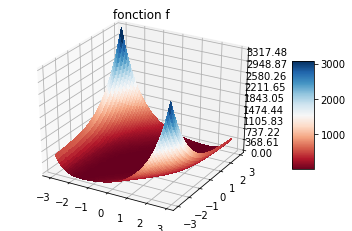

In [5]:
fig = plt.figure()
ax = fig.gca(projection='3d', title='fonction f')

surf = ax.plot_surface(X, Y, Zf, rstride=1, cstride=1, 
                      cmap=cm.RdBu,linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

On evalue g : 

In [6]:
Zg = g([X, Y])

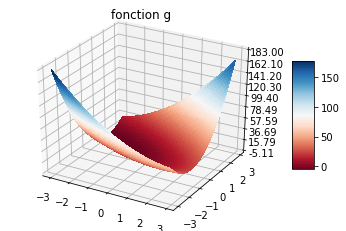

In [7]:
fig = plt.figure()
ax = fig.gca(projection='3d', title='fonction g')

surf = ax.plot_surface(X, Y, Zg, rstride=1, cstride=1, cmap=cm.RdBu,linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

## 1- Implémentation de la méthode de gradient
***

#### Algorithme de gradient générique : 

Construction d'une suite telle que 


\begin{align*}
    x_{k+1} = x_k - \alpha_k D_k \nabla f(x_k)
\end{align*}

où $\alpha_k$est tel que : 

\begin{align*}
    f(x_k-\alpha_kD_k\nabla f(x_k)) = min_{\alpha\ge0} (f(x_k-\alpha D_k \nabla f(x_k))
\end{align*}


et $D_k$ est une matrice définie positive 

***
***

#### Algorithme de la plus grande pente : 

$D_k = I$

Soif $f \in C^1$, $x_0$, et $\alpha_k > 0$ k=0,1,2,...

Arrêt = faux; k=0

Tant que Arrêt = Faux, Faire 

Debut
<br>
&emsp;$x_{k+1} = x_k - \alpha_k \nabla f(x_k)$<br>
&emsp;Si (Cond d'arrêt) alors Arrêt=vrai<br>
&emsp;Sinon k=k+1<br>
Fin

***

In [8]:
#Définition du pas alpha : 
alpha = 0.1

#Pc = Pas constant

def Gradient(f, gradf, x, PC=True, alpha=0.1, epsilon=10**(-7), stepmax=10000):
    Arret=False
    k=0
    X_array=np.array([x])
    
    while(Arret==False) and (k < stepmax):
        # On vérifie si le pas est constant ou non
        # si non, on le calcule grâce à optimize.line_search
        if not(PC):
            result_alpha = optimize.line_search(f, gradf, x, -gradf(x))
            alpha=result_alpha[0]
        #On calcul x_k+1 à partir de x_k grâce à la formule :
        x = x - alpha*gradf(x)
        X_array = np.concatenate([X_array, [x]])
        
        #Si le gradient de la fonction est très proche de zéro (inférieur à espilon) pour la valeur de x, on arrête l'algorithme
        #Sinon, on incrémente k
        if np.linalg.norm(gradf(x)) < epsilon:
            Arret=True    
        else:
            k+=1
    
    print('{} iterations'.format(k))
    return X_array, x

In [9]:
x0 = np.array([0., 2.])
X_GPC, x_gpc = Gradient(f=g, gradf=gradg, x=x0, PC=False, alpha=0.06, epsilon=10**(-7), stepmax=10000)
X_GPV,x_gpv = Gradient(f=f, gradf=gradf, x=x0, PC=False, alpha=0.8, epsilon=10**(-7), stepmax=20000)

12 iterations
19608 iterations


On remarque que les deux fonctions f et g réagissent très différement lorsqu'on les optimises avec la methode du gradient a pas non constant. Cela s'explique par le fait que g est convexe, alors que f ne l'est pas.

#### On compare les méthodes codées ci-dessus avec les méthodes de : 
- Méthode de Newton *`optimize.fmin_ncg`*
- Gradient conjugué *`optimize.fmin_cg`*
- Quasi-newtonienne de Broyden, Fletcher, Goldfarb, et Shanno (BFGS) semblable à celle deDavidon, Fletcher et Powell (DFP) mentionnée en cours : *`optimize.fmin_bfgs`*
- Force Brute *`optimize.brute`*

Pour cela, on code la fonction *`compare_fncts`*

In [10]:
def compare_fncts(x0, f, fprime, fhess, nb_iter=1, alpha_pc=0.1, stepmax=10000):
    print_str = '    x optimal = [{0:.4f},{1:.4f}]\n    valeur de f : {2:.1e}\n    en {3:.1f}ms'
    
    
    print('Gradient à pas constants')
    t1 = time.time()
    for i in range(nb_iter):
        X_GPC, x_gpc = Gradient(f=f, gradf=fprime, x=x0, PC=True, alpha=alpha_pc, epsilon=10**(-7), stepmax=stepmax)
    t2 = time.time()
    print(print_str.format(x_gpc[0], x_gpc[1], f(x_gpc), (t2 - t1)*1e3))
    
    
    print('\n\nGradient à pas variables')
    t1 = time.time()
    for i in range(nb_iter):
        XGPV,x_gpv = Gradient(f=f, gradf=fprime, x=x0, PC=False, alpha=0.1, epsilon=10**(-7), stepmax=stepmax)
    t2 = time.time()
    print(print_str.format(x_gpv[0], x_gpv[1], f(x_gpv), (t2 - t1)*1e3))
    
    
    print('\n\nAlgorithme de Newton\nMatrice Hessienne approximée')
    t1 = time.time()
    for i in range(nb_iter):
        x_new = optimize.fmin_ncg(f=f,x0=x0,fprime=gradf, maxiter=stepmax, disp=False)
    t2 = time.time()
    print(print_str.format(x_new[0], x_new[1], f(x_new), (t2 - t1)*1e3))    
    print('Matrice Hessienne donnée')
    t1 = time.time()
    for i in range(nb_iter):
        x_new = optimize.fmin_ncg(f=f,x0=x0,fprime=gradf, fhess=fhess, maxiter=stepmax, disp=False)
    t2 = time.time()
    print(print_str.format(x_new[0], x_new[1], f(x_new), (t2 - t1)*1e3))    

    
    print('\n\nGradient conjugué\nGradient approximé')
    t1 = time.time()
    for i in range(nb_iter):
        x_gc = optimize.fmin_cg(f=f,x0=x0, maxiter=stepmax, disp=False)
    t2 = time.time()
    print(print_str.format(x_gc[0], x_gc[1], f(x_gc), (t2 - t1)*1e3))
    print('Gradient donné')
    t1 = time.time()
    for i in range(nb_iter):
        x_gc = optimize.fmin_cg(f=f,x0=x0,fprime=gradf, maxiter=stepmax, disp=False)
    t2 = time.time()
    print(print_str.format(x_gc[0], x_gc[1], f(x_gc), (t2 - t1)*1e3))
    
    
    print('\n\nQuasi-newtonienne de Broyden, Fletcher, Goldfarb, et Shanno (BFGS) semblable à celle deDavidon, Fletcher et Powell (DFP)')
    t1 = time.time()
    for i in range(nb_iter):
        x_quasi_new = optimize.fmin_bfgs(f=f,x0=x0,fprime=gradf, maxiter=stepmax, disp=False)
    t2 = time.time()
    print(print_str.format(x_quasi_new[0], x_quasi_new[1], f(x_quasi_new), (t2 - t1)*1e3))
    
    
    print('\n\nForce Brute')
    lower_bound = np.zeros(2, dtype=float)
    upper_bound = -np.zeros(2, dtype=float)
    t1 = time.time()
    for i in range(nb_iter):
        x_brute = optimize.brute(func=f,ranges=(lower_bound, upper_bound))
    t2 = time.time()
    print(print_str.format(x_brute[0], x_brute[1], f(x_brute), (t2-t1)*1e3))

**Execution de la fonction :**

In [11]:
x0=np.array([0.2,0.2])

compare_fncts(x0, f, gradf, hessf, alpha_pc=0.5, stepmax=50000)

Gradient à pas constants
23219 iterations
    x optimal = [0.0023,0.0000]
    valeur de f : 5.8e-11
    en 2888.4ms


Gradient à pas variables
19536 iterations
    x optimal = [0.0018,0.0000]
    valeur de f : 2.0e-11
    en 5297.4ms


Algorithme de Newton
Matrice Hessienne approximée
    x optimal = [0.0034,0.0000]
    valeur de f : 2.6e-10
    en 4.9ms
Matrice Hessienne donnée
    x optimal = [0.0034,0.0000]
    valeur de f : 2.6e-10
    en 6.7ms


Gradient conjugué
Gradient approximé
    x optimal = [0.0003,0.0000]
    valeur de f : 1.5e-14
    en 2.9ms
Gradient donné
    x optimal = [0.0003,0.0000]
    valeur de f : 1.5e-14
    en 2.2ms


Quasi-newtonienne de Broyden, Fletcher, Goldfarb, et Shanno (BFGS) semblable à celle deDavidon, Fletcher et Powell (DFP)
    x optimal = [0.0100,0.0000]
    valeur de f : 2.0e-08
    en 4.3ms


Force Brute
    x optimal = [0.0000,0.0000]
    valeur de f : 0.0e+00
    en 7.1ms


Pour la fonction f, nos implémentations sont significativement plus longues que toutes les fonctions pré-implémentées avec lesquelles nous les avons comparées. Cela viens du fait que non seulement ce sont des methodes moins puissantes, mais aussi parce que ces fonctions sont optimisées pour fonctionner aussi rapidement que possible.

La methode de _force brute_ obtiens les meilleures performances en rapidité et en précision (la solution exacte est trouvée), mais cela viens sans doute du fait que $x^* = 0$, une valeur testée par l'algorithme de force brute. Il s'agit donc d'un cas particulier où la fonction _force brute_ fonctionne particulièrement bien

La seconde methode la plus rapide est la methode de _gradient conjugué_ lorsque l'on fourni le Gradient, qui est égaleent la seconde methode la plus précise après celle de _force brute_

#### Illustration de la convergence pour les méthodes de gradient à pas constant ou non et de celle de Newton pour la fonction f: 

In [12]:
X_GPC, x_gpc = Gradient(f=f, gradf=gradf, x=x0, PC=True, alpha=0.5, epsilon=1e-7, stepmax=100000)
X_GPV,x_gpv = Gradient(f=f, gradf=gradf, x=x0, PC=False, alpha=0.1, epsilon=1e-7, stepmax=100000)
x_new, X_new = optimize.fmin_ncg(f=f,x0=x0,fprime=gradf, fhess=hessf, maxiter=10000, disp=True, retall=True)

23219 iterations
19536 iterations
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 26
         Hessian evaluations: 13


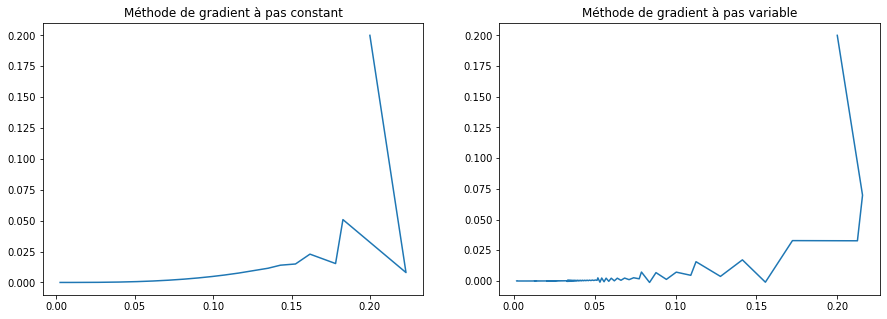

In [13]:
#Façon d'approcher le point : 

fig = plt.figure(1, figsize=(15, 5))
plt.subplot(1,2,1)
plt.title('Méthode de gradient à pas constant')
plt.plot(X_GPC[:,0],X_GPC[:,1])

plt.subplot(1,2,2)
plt.title('Méthode de gradient à pas variable')
plt.plot(X_GPV[:,0],X_GPV[:,1])

plt.tight_layout
plt.show()

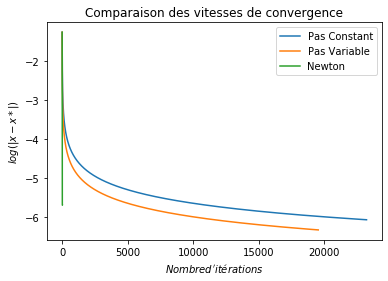

In [14]:
#Vitesse de convergence : 
X_new = np.array(X_new)

plt.title('Comparaison des vitesses de convergence')
plt.ylabel('$log(|x-x*|)$')
plt.xlabel('$Nombre d\'itérations$')
plt.plot(np.log(np.sqrt(X_GPC[:,0]**2 + X_GPC[:,1]**2)))
plt.plot(np.log(np.sqrt(X_GPV[:,0]**2 + X_GPV[:,1]**2)))
plt.plot(np.log(np.sqrt(X_new[:,0]**2 + X_new[:,1]**2)))

plt.legend(('Pas Constant', 'Pas Variable', 'Newton'))

#plt.tight_layout
plt.show()

On s'appercoit que la methode du gradient a pas variable converge plus vite que celle a pas constant, et que la méthode de Newton pré-implementée converge en un nombre très petit d'itérations face à nos méthodes

#### Critère d'arrêt : En tester plusieurs ! 

#### Pour la fonction quadratique et convexe :
<br>Gradient : linérairemnt
<br>Newton : peu d'iter
<br>Gradient conjugué : n iter
<br> et tester le alpha avec les valeurs propres vues en classe 

## Avec g(x) : 

In [15]:
x0=np.array([0.3,0.1])

In [16]:
compare_fncts(x0, g, gradg, hessg, alpha_pc=0.01, stepmax=10000)

Gradient à pas constants
876 iterations
    x optimal = [-1.9545,1.0909]
    valeur de f : -5.1e+00
    en 17.2ms


Gradient à pas variables
87 iterations
    x optimal = [-1.9545,1.0909]
    valeur de f : -5.1e+00
    en 9.6ms


Algorithme de Newton
Matrice Hessienne approximée
    x optimal = [0.0032,0.0000]
    valeur de f : 9.8e-03
    en 1.8ms
Matrice Hessienne donnée
    x optimal = [0.1387,0.0227]
    valeur de f : 4.1e-01
    en 3.5ms


Gradient conjugué
Gradient approximé
    x optimal = [-1.9545,1.0909]
    valeur de f : -5.1e+00
    en 0.5ms
Gradient donné
    x optimal = [0.0393,0.0010]
    valeur de f : 1.2e-01
    en 2.2ms


Quasi-newtonienne de Broyden, Fletcher, Goldfarb, et Shanno (BFGS) semblable à celle deDavidon, Fletcher et Powell (DFP)
    x optimal = [0.0080,0.0000]
    valeur de f : 2.4e-02
    en 1.3ms


Force Brute
    x optimal = [-1.9545,1.0909]
    valeur de f : -5.1e+00
    en 5.7ms


Nos methodes de _gradient à pas constant_ et _à pas variables_ sont ici bien plus rapides que pour la fonciton f. Cela s'explique par le fait que la fonction g est convexe, ce qui n'est pas le cas de la fonction f.

On remarque que certaines methodes arrivent bien à minimiser g, et convergent vers le point $x_f =[-1.9545, 1.0909]$ pour lequel $g(x_f) = -5.1$. Cependant, d'autres méthodes convergent vers un point d'annulation de g, $x_f = [0, 0]$ tel que $g(x_f) = 0$

Nos méthodes convergent bien vers le minima global de $g$, bien que lentement.
L'algorithme de Newton ainsi que le BFGS convergent rapidement vers un point d'annulation de $g$ sans trouver le minimum global.

La methode de force brute converge plus rapidement que nos methodes vers le minima global.

Enin, le gradient conjugué converge très rapidement vers le minima global lorsque l'expression explicite du gradient est donné, mais ne converge que vers un point d'annulation lorsque le gradient explicite est donné.

In [17]:
X_GPC, x_gpc = Gradient(f=g, gradf=gradg, x=x0, PC=True, alpha=0.08, epsilon=10**(-7), stepmax=10000)
X_GPV, x_gpv = Gradient(f=g, gradf=gradg, x=x0, PC=False, alpha=0.1, epsilon=10**(-7), stepmax=10000)

101 iterations
87 iterations


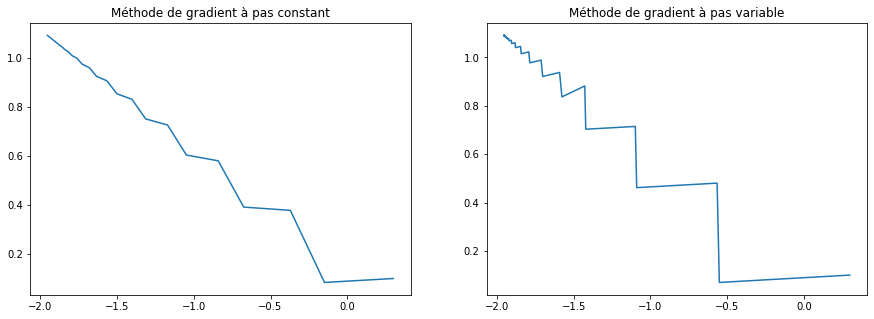

In [18]:
#Façon d'approcher le point : 

fig = plt.figure(1, figsize=(15, 5))
plt.subplot(1,2,1)
plt.title('Méthode de gradient à pas constant')
plt.plot(X_GPC[:,0],X_GPC[:,1])

plt.subplot(1,2,2)
plt.title('Méthode de gradient à pas variable')
plt.plot(X_GPV[:,0],X_GPV[:,1])

plt.tight_layout
plt.show()